In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT 
np.random.shuffle(brainT)
print(brainT)

[[ 1.0  19.5  1642.6 ...  5.3  1.0  0.0]
 [ 1.0  1.5  135.9 ...  5.3  0.9  0.0]
 [ 0.0  15.3  813.5 ...  4.4  1.0  0.0]
 ...
 [ 0.0  8.8  523.7 ...  3.1  1.0  0.0]
 [ 0.0  5.9  512.2 ...  3.8  1.0  0.0]
 [ 1.0  7.2  900.3 ...  6.0  0.9  0.0]]


In [6]:
#Dropping everything below 60% accuracy
brainT = np.delete(brainT, 13, axis = 1)
brainT = np.delete(brainT, 12, axis = 1)
brainT = np.delete(brainT, 7, axis = 1)
brainT = np.delete(brainT, 6, axis = 1)
brainT = np.delete(brainT, 3, axis = 1)
brainT = np.delete(brainT, 2, axis = 1)
brainT = np.delete(brainT, 1, axis = 1)
print(brainT)

[[ 1.0  0.0  3.0 ...  0.0  0.4  5.3]
 [ 1.0  0.0  8.5 ...  0.0  0.3  5.3]
 [ 0.0  0.1  2.4 ...  0.1  0.5  4.4]
 ...
 [ 0.0  0.3  3.0 ...  0.2  0.7  3.1]
 [ 0.0  0.1  4.2 ...  0.1  0.6  3.8]
 [ 1.0  0.0  4.5 ...  0.0  0.4  6.0]]


In [7]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [8]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 4s 19ms/step - loss: 0.6591 - accuracy: 0.5896 - val_loss: 0.6429 - val_accuracy: 0.6241
Epoch 2/500
83/83 [==============================] - 1s 9ms/step - loss: 0.6235 - accuracy: 0.7274 - val_loss: 0.6079 - val_accuracy: 0.7739
Epoch 3/500
83/83 [==============================] - 1s 8ms/step - loss: 0.5877 - accuracy: 0.8223 - val_loss: 0.5734 - val_accuracy: 0.8466
Epoch 4/500
83/83 [==============================] - 1s 7ms/step - loss: 0.5529 - accuracy: 0.8516 - val_loss: 0.5401 - val_accuracy: 0.8546
Epoch 5/500
83/83 [==============================] - 1s 8ms/step - loss: 0.5179 - accuracy: 0.8709 - val_loss: 0.5058 - val_accuracy: 0.8688
Epoch 6/500
83/83 [==============================] - 1s 8ms/step - loss: 0.4832 - accuracy: 0.8789 - val_loss: 0.4731 - val_accuracy: 0.8768
Epoch 7/500
83/83 [==============================] - 1s 8ms/step - loss: 0.4517 - accuracy: 0.8827 - val_loss: 0.4435 - val_accuracy: 0.8794
Epoch 8/500


Epoch 59/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1103 - accuracy: 0.9647 - val_loss: 0.0965 - val_accuracy: 0.9725
Epoch 60/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1089 - accuracy: 0.9677 - val_loss: 0.0954 - val_accuracy: 0.9725
Epoch 61/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1078 - accuracy: 0.9674 - val_loss: 0.0937 - val_accuracy: 0.9725
Epoch 62/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1066 - accuracy: 0.9681 - val_loss: 0.0932 - val_accuracy: 0.9761
Epoch 63/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1060 - accuracy: 0.9674 - val_loss: 0.0920 - val_accuracy: 0.9752
Epoch 64/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1049 - accuracy: 0.9681 - val_loss: 0.0908 - val_accuracy: 0.9752
Epoch 65/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1040 - accuracy: 0.9681 - val_loss: 0.0893 - val_accuracy: 0.9734
Epoch 

83/83 [==============================] - 1s 7ms/step - loss: 0.0846 - accuracy: 0.9730 - val_loss: 0.0654 - val_accuracy: 0.9823
Epoch 117/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0846 - accuracy: 0.9734 - val_loss: 0.0656 - val_accuracy: 0.9823
Epoch 118/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0842 - accuracy: 0.9734 - val_loss: 0.0662 - val_accuracy: 0.9814
Epoch 119/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0845 - accuracy: 0.9746 - val_loss: 0.0655 - val_accuracy: 0.9832
Epoch 120/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0842 - accuracy: 0.9738 - val_loss: 0.0657 - val_accuracy: 0.9814
Epoch 121/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0843 - accuracy: 0.9730 - val_loss: 0.0648 - val_accuracy: 0.9823
Epoch 122/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0840 - accuracy: 0.9738 - val_loss: 0.0654 - val_accuracy: 0.9814
Epoch 123/500

83/83 [==============================] - 1s 9ms/step - loss: 0.0804 - accuracy: 0.9742 - val_loss: 0.0594 - val_accuracy: 0.9823
Epoch 174/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0805 - accuracy: 0.9742 - val_loss: 0.0589 - val_accuracy: 0.9823
Epoch 175/500
83/83 [==============================] - 1s 9ms/step - loss: 0.0803 - accuracy: 0.9742 - val_loss: 0.0591 - val_accuracy: 0.9823
Epoch 176/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0804 - accuracy: 0.9753 - val_loss: 0.0591 - val_accuracy: 0.9823
Epoch 177/500
83/83 [==============================] - 1s 10ms/step - loss: 0.0802 - accuracy: 0.9753 - val_loss: 0.0588 - val_accuracy: 0.9832
Epoch 178/500
83/83 [==============================] - 1s 11ms/step - loss: 0.0804 - accuracy: 0.9749 - val_loss: 0.0599 - val_accuracy: 0.9832
Epoch 179/500
83/83 [==============================] - 1s 8ms/step - loss: 0.0803 - accuracy: 0.9746 - val_loss: 0.0588 - val_accuracy: 0.9832
Epoch 180/5

83/83 [==============================] - 0s 6ms/step - loss: 0.0793 - accuracy: 0.9753 - val_loss: 0.0569 - val_accuracy: 0.9832
Epoch 231/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0792 - accuracy: 0.9761 - val_loss: 0.0568 - val_accuracy: 0.9832
Epoch 232/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0794 - accuracy: 0.9765 - val_loss: 0.0569 - val_accuracy: 0.9832
Epoch 233/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0790 - accuracy: 0.9768 - val_loss: 0.0593 - val_accuracy: 0.9849
Epoch 234/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0793 - accuracy: 0.9757 - val_loss: 0.0581 - val_accuracy: 0.9840
Epoch 235/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0793 - accuracy: 0.9765 - val_loss: 0.0566 - val_accuracy: 0.9832
Epoch 236/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0787 - accuracy: 0.9765 - val_loss: 0.0583 - val_accuracy: 0.9840
Epoch 237/500

83/83 [==============================] - 1s 7ms/step - loss: 0.0791 - accuracy: 0.9757 - val_loss: 0.0569 - val_accuracy: 0.9832
Epoch 288/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.0562 - val_accuracy: 0.9832
Epoch 289/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0787 - accuracy: 0.9768 - val_loss: 0.0570 - val_accuracy: 0.9832
Epoch 290/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.0561 - val_accuracy: 0.9832
Epoch 291/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.0565 - val_accuracy: 0.9823
Epoch 292/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0788 - accuracy: 0.9772 - val_loss: 0.0564 - val_accuracy: 0.9832
Epoch 293/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0788 - accuracy: 0.9768 - val_loss: 0.0562 - val_accuracy: 0.9832
Epoch 294/500

83/83 [==============================] - 1s 6ms/step - loss: 0.0789 - accuracy: 0.9765 - val_loss: 0.0561 - val_accuracy: 0.9823
Epoch 345/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0787 - accuracy: 0.9761 - val_loss: 0.0558 - val_accuracy: 0.9832
Epoch 346/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9753 - val_loss: 0.0560 - val_accuracy: 0.9832
Epoch 347/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0788 - accuracy: 0.9761 - val_loss: 0.0562 - val_accuracy: 0.9823
Epoch 348/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0786 - accuracy: 0.9757 - val_loss: 0.0560 - val_accuracy: 0.9832
Epoch 349/500
83/83 [==============================] - 1s 7ms/step - loss: 0.0786 - accuracy: 0.9757 - val_loss: 0.0568 - val_accuracy: 0.9840
Epoch 350/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0788 - accuracy: 0.9757 - val_loss: 0.0566 - val_accuracy: 0.9832
Epoch 351/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0786 - accuracy: 0.9757 - val_loss: 0.0556 - val_accuracy: 0.9832
Epoch 402/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0786 - accuracy: 0.9768 - val_loss: 0.0574 - val_accuracy: 0.9849
Epoch 403/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0787 - accuracy: 0.9768 - val_loss: 0.0561 - val_accuracy: 0.9832
Epoch 404/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.0568 - val_accuracy: 0.9832
Epoch 405/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9765 - val_loss: 0.0556 - val_accuracy: 0.9832
Epoch 406/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0785 - accuracy: 0.9761 - val_loss: 0.0555 - val_accuracy: 0.9832
Epoch 407/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0787 - accuracy: 0.9757 - val_loss: 0.0556 - val_accuracy: 0.9832
Epoch 408/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0781 - accuracy: 0.9757 - val_loss: 0.0562 - val_accuracy: 0.9840
Epoch 459/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0785 - accuracy: 0.9765 - val_loss: 0.0559 - val_accuracy: 0.9832
Epoch 460/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0784 - accuracy: 0.9768 - val_loss: 0.0562 - val_accuracy: 0.9832
Epoch 461/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0785 - accuracy: 0.9761 - val_loss: 0.0559 - val_accuracy: 0.9832
Epoch 462/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0787 - accuracy: 0.9761 - val_loss: 0.0559 - val_accuracy: 0.9823
Epoch 463/500
83/83 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9761 - val_loss: 0.0559 - val_accuracy: 0.9823
Epoch 464/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0784 - accuracy: 0.9768 - val_loss: 0.0557 - val_accuracy: 0.9832
Epoch 465/500

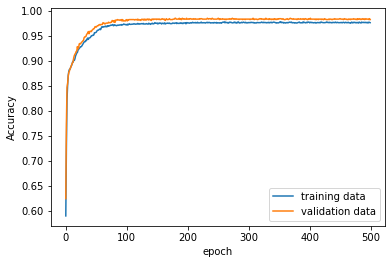

In [10]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [11]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 3ms/step - loss: 0.0777 - accuracy: 0.9765


In [12]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9823


In [13]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]]
83/83 [==============================] - 0s 3ms/step
[[ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]
 [ 0.1]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9827288428324698
0.964406779661017
0.9734816082121471


In [15]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 1.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]]
36/36 [==============================] - 0s 3ms/step
[[ 1.0]
 [ 1.0]
 [ 0.1]
 [ 0.0]
 [ 0.1]]


In [16]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.9898580121703854
0.9701789264413518
0.9799196787148594
